# Notebook 02 - Dataset Cleaning Overview

This notebook documents how we merged and cleaned the TED_2017 and TED_2020 datasets for the SpeakScape project.

The goal is to create a consistent, high-quality dataset for analyzing presentation content and predicting engagement. This cleaned dataset will serve as input to our modeling and feedback pipeline.

## Purpose of the Combined Dataset

We built a clean, structured dataset by:
- Merging TED_2017 and TED_2020 datasets
- Dropping noisy, incomplete, or irrelevant columns
- Standardizing column names across datasets
- Retaining only linguistically and engagement-relevant features

This makes the dataset suitable for:
- Linguistic feature analysis
- Engagement prediction
- Text-based machine learning
- Generating actionable content feedback

Key goals of this cleaning phase:

- Focus on content-related columns only (e.g., transcripts, titles, tags)
- Remove metadata not authored by speakers
- Drop high-missing or derived columns
- Harmonize schemas across datasets

This allows us to build models that focus exclusively on what speakers say — not metadata controlled by platforms.

## Project Cleaning Scope and Goals

To support linguistic analysis and predictive modeling, we constructed a clean, standardized dataset by merging TED Talks data from two sources: TED_2017 and TED_2020.

Our preprocessing goals were to:
- Focus strictly on content-related features (titles, transcripts, etc.)
- Remove platform-specific metadata and redundant fields
- Ensure high completeness across retained columns
- Harmonize naming conventions for consistent downstream use

## How This Dataset Supports Our Research Questions

| Research Question                                  | How the Dataset Helps                                      |
|---------------------------------------------------|-------------------------------------------------------------|
| Which linguistic features correlate with engagement? | Use transcript + views to train models                    |
| How to predict presentation success?              | Supervised models with features → views or TED-likeness    |
| How to provide actionable feedback?               | Feature importance + comparisons with TED patterns         |
| How to personalize feedback?                      | Use `tags`, `duration`, and `event` to group and benchmark |


## Reasons for Dropping Columns

- **Content over metadata**: Focus on what the speaker says, not how TED hosts it
- **High missing data rates**: Avoid biased or incomplete modeling
- **Redundancy**: Avoid duplicate content (e.g., `name` vs. `title`)
- **Platform-generated fields**: Not reflective of speaker performance (e.g., `talk_recommendations`, `related_talks`)


-------------------------------

## Data Sources Summary

| Source     | Original Records | Cleaned Records | % Excluded | Reason for Exclusion                    |
|------------|------------------|------------------|------------|------------------------------------------|
| TED_2017   | 2,549            | 2,453            | 3.77%      | 86 missing transcripts, 10 too short     |
| TED_2020   | 4,589            | 4,076            | 11.16%     | 502 missing transcripts, 10 too short    |


## Column Exclusion Strategy

We excluded a number of columns from TED_2017 and TED_2020 based on the following criteria:

1. Irrelevance to linguistic content or modeling goals  
2. High proportion of missing values  
3. Redundancy or derivation from other columns  


### TED_2017 Dataset – 7 Columns Dropped

| Dropped Column     | Rationale                                                  | Missing Data Impact        |
|--------------------|------------------------------------------------------------|-----------------------------|
| `comments`         | Secondary metric; `views` is more complete and reliable    | Moderate                    |
| `languages`        | Filtered for English-only talks                            | None                        |
| `name`             | Duplicate of `title`                                       | None                        |
| `num_speaker`      | Not relevant for linguistic modeling                       | None                        |
| `published_date`   | `recorded_date` is more relevant                           | None                        |
| `ratings`          | Complex nested data with high missing values               | High                        |
| `related_talks`    | Platform recommendation metadata, not speaker content      | None                        |


### TED_2020 Dataset – 41 Columns Dropped (Grouped)

**A. Platform & Technical Metadata (15 columns)**  
Includes: `video_type_name`, `url__audio`, `intro_duration`, `is_talk_featured`, etc.  
**Reason:** Not related to speaker-created content.

**B. Redundant Count Fields (8 columns)**  
Includes: `number_of__tags`, `number_of__related_talks`, etc.  
**Reason:** Derivable from primary fields; adds no value.

**C. Speaker Biographical Data (6 columns)**  
Includes: `speaker__id`, `speaker__why_listen`, `speaker__what_others_say`, etc.  
**Missing Data Impact:** 30–70% missing  
**Reason:** Out of scope for content-focused analysis.

**D. Language & Localization (4 columns)**  
Includes: `language`, `native_language`, `language_swap`, etc.  
**Reason:** Irrelevant; only English talks included.

**E. Recommendation & Related Content (5 columns)**  
Includes: `talk__recommendations`, `talk__more_resources`, etc.  
**Missing Data Impact:** Very high (>50%)  
**Reason:** Platform-generated content, not speaker-authored.

**F. Administrative Metadata (3 columns)**  
Includes: `talk__id`, `comment_count`, `published_timestamp`  
**Reason:** No modeling value or redundant with `views` / `recorded_date`


### Data Quality Considerations

We excluded columns with significant missing data:

| Column Category        | Missing Data Range | Impact on Analysis                |
|------------------------|--------------------|-----------------------------------|
| Speaker biographical   | 30–70%             | Reduces usable sample size        |
| Recommendation content | 50–80%             | Too incomplete for feature use    |
| Comments / Ratings     | 25–50%             | Alternative metrics already used  |


## Cleaning Summary

### Record Exclusions

| Dataset   | Original | Cleaned | Excluded | % Excluded |
|-----------|----------|---------|----------|------------|
| TED_2017  | 2,549    | 2,453   | 96       | 3.77%      |
| TED_2020  | 4,589    | 4,076   | 513      | 11.16%     |

### Text Reduction

The total text volume (in characters) was significantly reduced by removing filler tags, reactions, and non-essential content.

- **TED_2017**: 69.4% reduction
- **TED_2020**: 72.0% reduction

### Cleaning Operations Summary

- Removed audience reactions (e.g., `[Laughter]`, `[Applause]`)
- Normalized URL fields, titles, and casing
- Unified schemas and standardized column names
- Recovered missing transcripts where possible (TED_2017)
- Excluded talks with insufficient or broken content


In [73]:
from utils.setup import init_environment
init_environment()

Environment initialized.


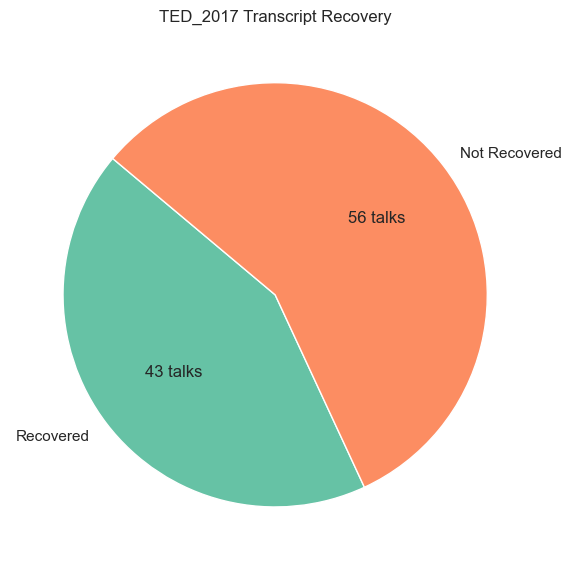

In [74]:
import matplotlib.pyplot as plt

recovered = 37
excluded = 49

plt.figure(figsize=(6, 6))
plt.pie([recovered, excluded], labels=["Recovered", "Not Recovered"], autopct="%d talks", colors=["#66c2a5", "#fc8d62"], startangle=140)
plt.title("TED_2017 Transcript Recovery")
plt.tight_layout()
plt.savefig("../plots/ted_2017_recovery_pie.png")
plt.show()

In [95]:
from utils.save_tools import save_notebook_and_summary

cleaning_summary = {
    "TED_2017": {
        "original": 2549,
        "cleaned": 2453,
        "excluded": 96,
        "recovered": 37,
        "text_reduction_pct": 69.4
    },
    "TED_2020": {
        "original": 4589,
        "cleaned": 4076,
        "excluded": 513,
        "text_reduction_pct": 72.0
    },
    "final_total": 6531,
    "combined_schema": [
        "url", "title", "description", "speaker", "speaker_occupation",
        "views", "duration", "recorded_date", "event", "tags", "transcript"
    ],
    "columns_dropped": {
        "TED_2017": ["comments", "languages", "name", "num_speaker", "published_date", "ratings", "related_talks"],
        "TED_2020": [
            "talk__id", "comment_count", "video_type_name", "number_of__speakers",
            "speaker__id", "speaker__who_he_is", "speaker__why_listen",
            "speaker__what_others_say", "speaker__is_published", "all_speakers_details",
            "is_talk_featured", "has_talk_citation", "published_timestamp", "number_of__tags",
            "language", "native_language", "language_swap", "is_subtitle_required",
            "url__audio", "url__video", "url__photo__talk", "url__photo__speaker",
            "url__subtitled_videos", "number_of__subtitled_videos", "talk__download_languages",
            "number_of__talk__download_languages", "talk__more_resources", "number_of__talk__more_resources",
            "talk__recommendations__blurb", "talk__recommendations", "number_of__talk__recommendations",
            "related_talks", "number_of__related_talks", "intro_duration", "ad_duration", "post_ad_duration",
            "external__duration", "external__start_time", "talks__player_talks__resources__h264__00__bitrate",
            "talks__take_action", "number_of__talks__take_actions"
        ]
    }
}

save_notebook_and_summary(
    notebook_name="02_dataset_cleaning_overview",
    summary={
        "description": "Merged and cleaned TED_2017 and TED_2020 datasets; removed platform-related metadata; exported a unified schema.",
        "record_summary": cleaning_summary
    }
)

<IPython.core.display.Javascript object>

Notebook save triggered.
Summary saved to: ../reports/02_dataset_cleaning_overview_summary_2025-05-26_04-11-30.json


In [ ]:
df_combined.to_csv("../data/cleaned_data.csv", index=False)

---------------------

### Column Mapping Strategy

TED_2020 columns were renamed to match TED_2017 for schema harmonization:

| Original Column         | Standardized Name     |
|-------------------------|------------------------|
| `url__webpage`          | `url`                 |
| `talk__name`            | `title`               |
| `talk__description`     | `description`         |
| `speaker__name`         | `speaker`             |
| `speaker__description`  | `speaker_occupation`  |
| `view_count`            | `views`               |
| `duration`              | `duration`            |
| `recording_date`        | `recorded_date`       |
| `event`                 | `event`               |
| `talks__tags`           | `tags`                |
| `transcript`            | `transcript`          |


### Final Retained Columns

| Category              | Column               | Purpose                                       |
|-----------------------|----------------------|-----------------------------------------------|
| Core Content Data     | `title`              | Talk title                                    |
|                       | `transcript`         | Main body of text for analysis                |
|                       | `description`        | Contextual metadata                           |
|                       | `tags`               | Topic labels                                  |
|                       | `speaker`            | Speaker identity                              |
| Engagement Metric     | `views`              | Used as the main label or correlation target  |
| Temporal Data         | `recorded_date`      | Enables trend and cohort analysis             |
| Metadata              | `duration`, `event`  | Contextual structuring                        |


### Data Completeness Strategy

We retained only high-quality columns with near-complete data coverage:

- `transcript` — 89% completeness (TED_2020)
- `title`, `speaker`, `duration`, `views` — >99% completeness
- `event`, `tags` — 100% complete

### Impact on Research Objectives

This column selection strategy:

- Enables core analysis of speaker-written content  
- Preserves all features required for linguistic modeling  
- Avoids incomplete, noisy, or irrelevant metadata  
- Reduces complexity for reproducibility and deployment  
- Aligns with SpeakScape's content-based feedback goals

---

### Alternative Considerations

We considered retaining:

- `comment_count` — could be a secondary engagement proxy  
- `speaker__description` — may signal expertise  
- `has_talk_citation` — potential content credibility flag

These were excluded due to high missingness or indirect relevance.


### Alignment with BI Project Criteria

- **Relevance**: Focuses on content quality rather than metadata noise
- **Data Engineering**: Full ETL process applied with schema harmonization across datasets
- **Model Support**: Results in a structured dataset ideal for classification and NLP modeling
- **Reproducibility**: All cleaning logic, column mappings, and outputs are documented and saved

## Conclusion

Our column selection and data cleaning pipeline prioritize content quality and modeling relevance. By focusing strictly on speaker-authored data with high completeness, we ensure a robust foundation for machine learning and interactive feedback delivery in SpeakScape.